In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

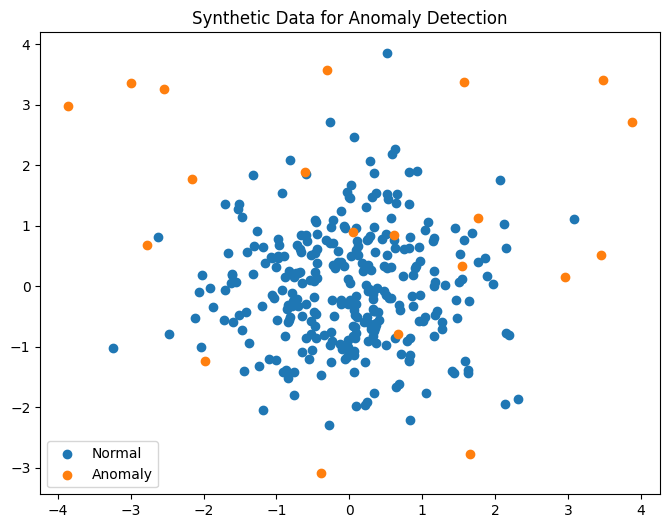

In [9]:

# Create synthetic data
np.random.seed(42)
# Normal data
X_normal = np.random.normal(0, 1, (300, 2))
# Anomalous data
X_anomaly = np.random.uniform(-4, 4, (20, 2))
# Combine the data
X = np.vstack((X_normal, X_anomaly))
# Labels: 1 for normal, -1 for anomaly
y = np.append(np.ones(X_normal.shape[0]), -np.ones(X_anomaly.shape[0]))

# Plotting function
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Normal')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], label='Anomaly')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the synthetic data
plot_data(X, y, 'Synthetic Data for Anomaly Detection')



In [11]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

Isolation Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       300
           1       0.65      0.65      0.65        20

    accuracy                           0.96       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.96      0.96      0.96       320

Accuracy: 0.96


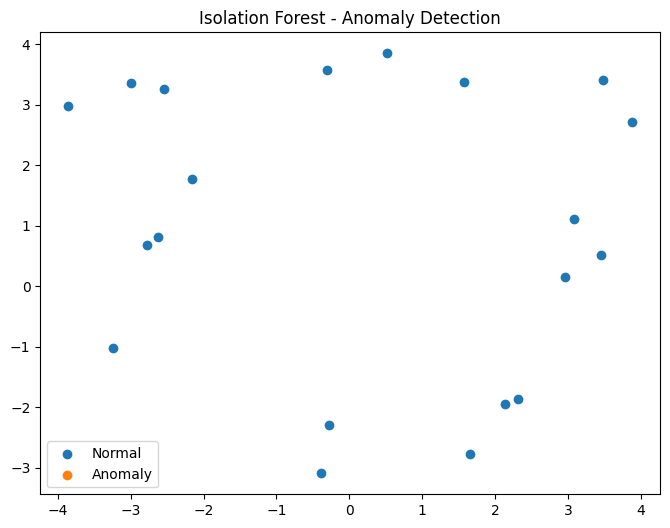

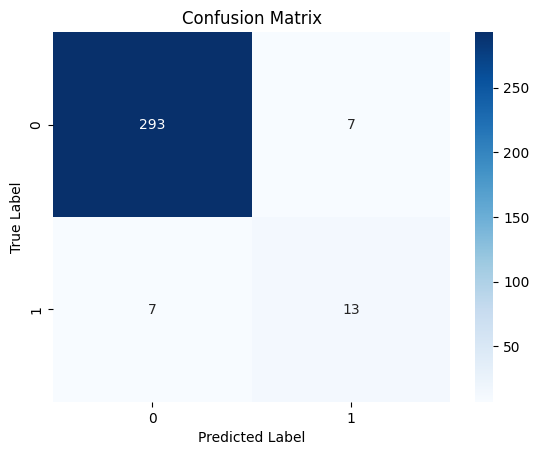

One-Class SVM Performance:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       300
           1       0.62      0.65      0.63        20

    accuracy                           0.95       320
   macro avg       0.80      0.81      0.80       320
weighted avg       0.95      0.95      0.95       320

Accuracy: 0.95


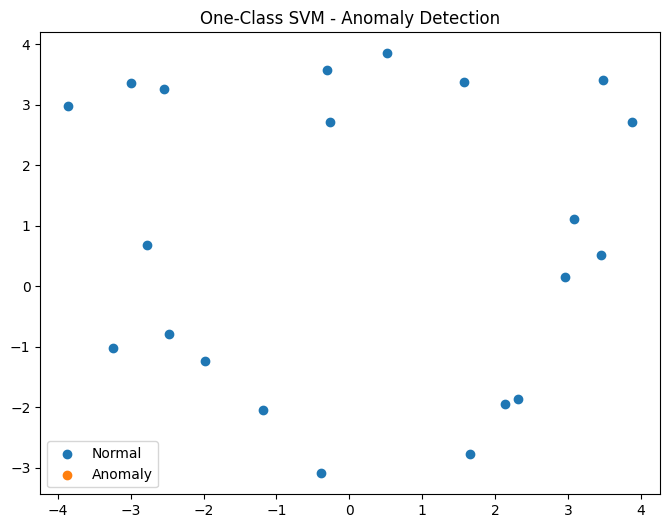

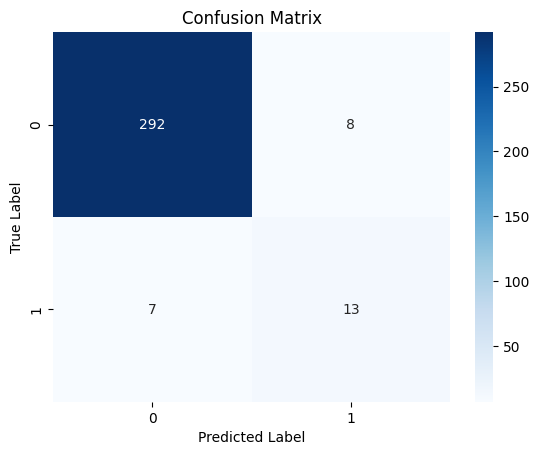

Local Outlier Factor Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       300
           1       0.65      0.65      0.65        20

    accuracy                           0.96       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.96      0.96      0.96       320

Accuracy: 0.96


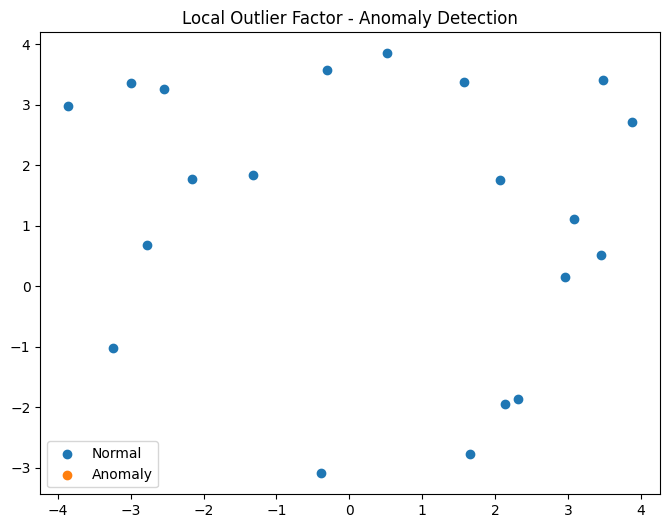

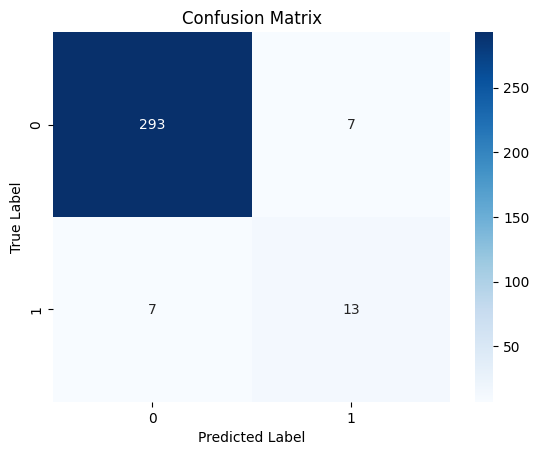

C:\ProgramData\miniconda3\envs\pythonCYBR520\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-Means Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       300
           1       0.70      0.35      0.47        20

    accuracy                           0.95       320
   macro avg       0.83      0.67      0.72       320
weighted avg       0.94      0.95      0.94       320

Accuracy: 0.95


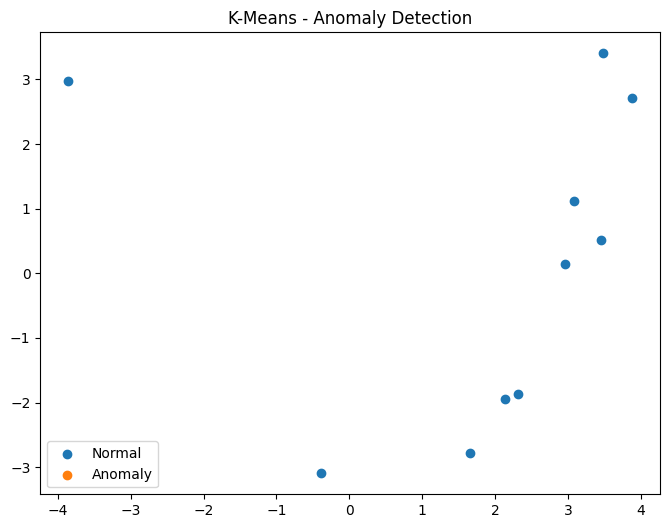

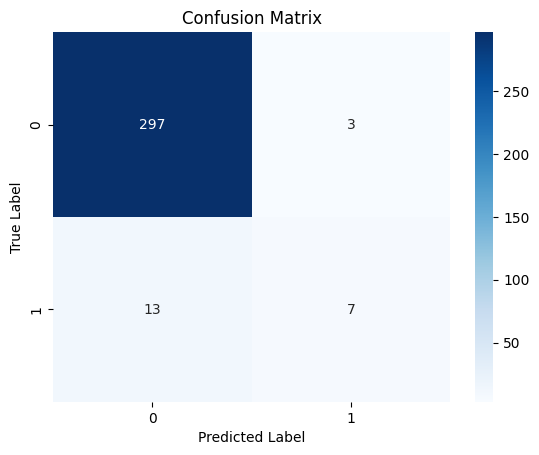

Elliptic Envelope Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       300
           1       0.65      0.65      0.65        20

    accuracy                           0.96       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.96      0.96      0.96       320

Accuracy: 0.96


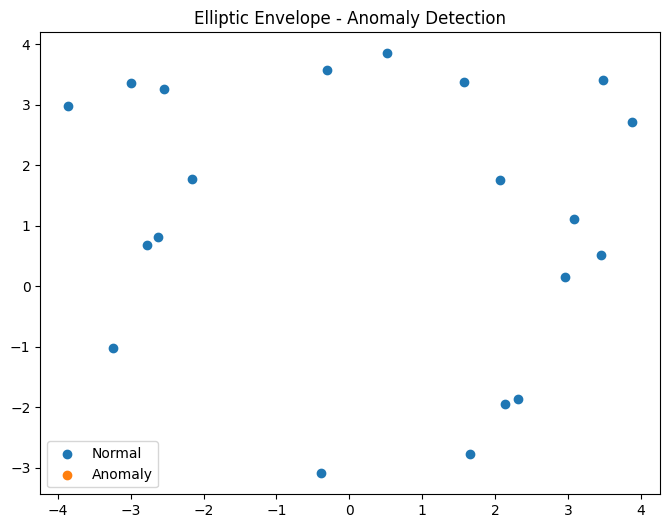

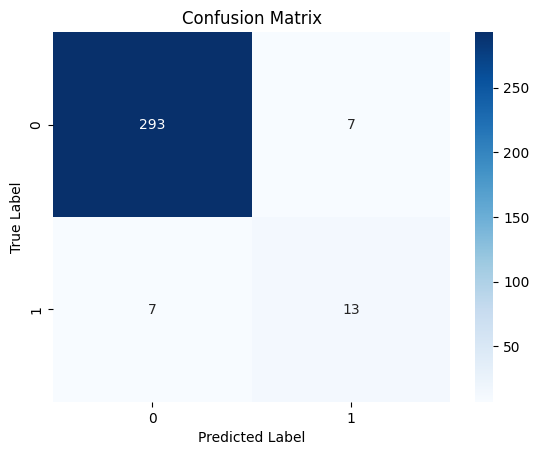

In [12]:

# Anomaly detection models
models = {
    "Isolation Forest": IsolationForest(n_estimators=100, contamination=float(np.count_nonzero(y==-1)/len(y))),
    "One-Class SVM": OneClassSVM(nu=float(np.count_nonzero(y==-1)/len(y)), kernel="rbf", gamma=0.1),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=float(np.count_nonzero(y==-1)/len(y))),
    "K-Means": KMeans(n_clusters=2, random_state=42),
    "Elliptic Envelope": EllipticEnvelope(contamination=float(np.count_nonzero(y==-1)/len(y)))
}

# Fit the models and evaluate
for name, model in models.items():
    # Special case for Local Outlier Factor because it does not have .predict()
    if name == "Local Outlier Factor":
        y_pred = model.fit_predict(X)
    elif name == "K-Means":
        # K-means is a bit different, need to determine which cluster is normal vs anomaly
        model.fit(X)
        cluster_centers = model.cluster_centers_
        distance = np.linalg.norm(X - cluster_centers[0], axis=1)
        threshold = np.percentile(distance, 97)  # Assuming 3% of data is anomalous
        y_pred = np.where(distance > threshold, -1, 1)
    else:
        model.fit(X)
        y_pred = model.predict(X)
    
    # Replace 1, -1 encoding to match labels
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    # Replace 1, -1 in original labels to 0,1 to match y_pred encoding
    y_true = np.where(y == 1, 0, 1)
    
    # Performance metrics
    print(f"{name} Performance:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    plot_data(X, y_pred, f'{name} - Anomaly Detection')
    

    # Assuming y_true and y_pred are defined as in the script above
    conf_matrix = confusion_matrix(y_true, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
